In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wind = xr.open_dataset('E:/for_hendrik_20230316/ERA5_10m_winds.nc')
wind

<xarray.Dataset>
Dimensions:    (longitude: 25, latitude: 29, time: 43824)
Coordinates:
  * longitude  (longitude) float32 118.0 118.2 118.5 118.8 ... 123.5 123.8 124.0
  * latitude   (latitude) float32 27.0 26.75 26.5 26.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2013-01-01 ... 2017-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-22 01:46:34 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

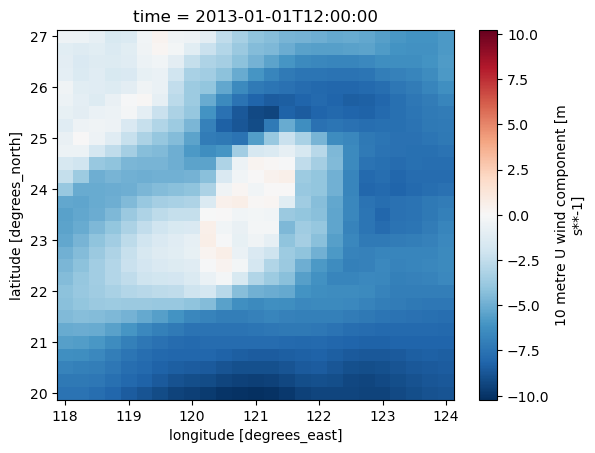

In [3]:
wind.sel(time='2013-01-01T12').u10.plot()

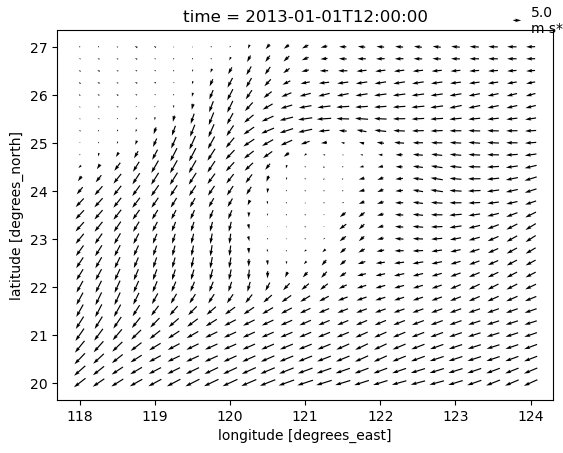

In [4]:
wind.sel(time='2013-01-01T12').plot.quiver(x='longitude', y='latitude',
                                           u='u10', v='v10')

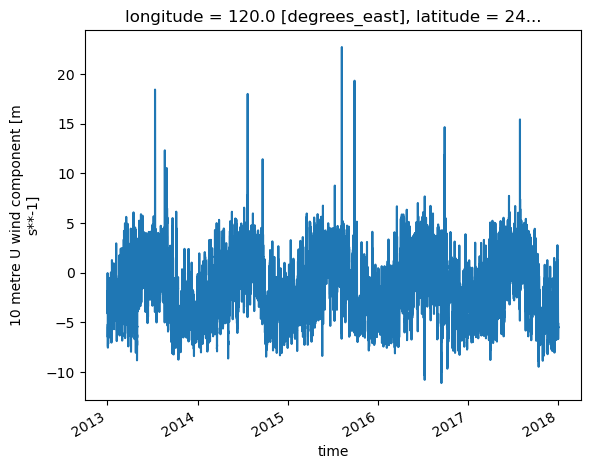

In [5]:
wind.sel(latitude=24, longitude=120, method='nearest').u10.plot()

In [6]:
wind.mean(dim='time')

<xarray.Dataset>
Dimensions:    (longitude: 25, latitude: 29)
Coordinates:
  * longitude  (longitude) float32 118.0 118.2 118.5 118.8 ... 123.5 123.8 124.0
  * latitude   (latitude) float32 27.0 26.75 26.5 26.25 ... 20.5 20.25 20.0
Data variables:
    u10        (latitude, longitude) float32 -0.09744 -0.1954 ... -3.719 -3.733
    v10        (latitude, longitude) float32 -0.1198 -0.06944 ... -0.5707

In [7]:
wind.resample(time='1D').mean()

<xarray.Dataset>
Dimensions:    (longitude: 25, latitude: 29, time: 1826)
Coordinates:
  * longitude  (longitude) float32 118.0 118.2 118.5 118.8 ... 123.5 123.8 124.0
  * latitude   (latitude) float32 27.0 26.75 26.5 26.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2017-12-31
Data variables:
    u10        (time, latitude, longitude) float32 -0.2936 -0.5496 ... -8.634
    v10        (time, latitude, longitude) float32 0.1276 0.3898 ... -6.756
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-22 01:46:34 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [8]:
wind.groupby('time.season').mean()

<xarray.Dataset>
Dimensions:    (longitude: 25, latitude: 29, season: 4)
Coordinates:
  * longitude  (longitude) float32 118.0 118.2 118.5 118.8 ... 123.5 123.8 124.0
  * latitude   (latitude) float32 27.0 26.75 26.5 26.25 ... 20.5 20.25 20.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    u10        (season, latitude, longitude) float32 -0.043 -0.1797 ... -4.59
    v10        (season, latitude, longitude) float32 -0.5848 -0.5597 ... -2.429
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-22 01:46:34 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

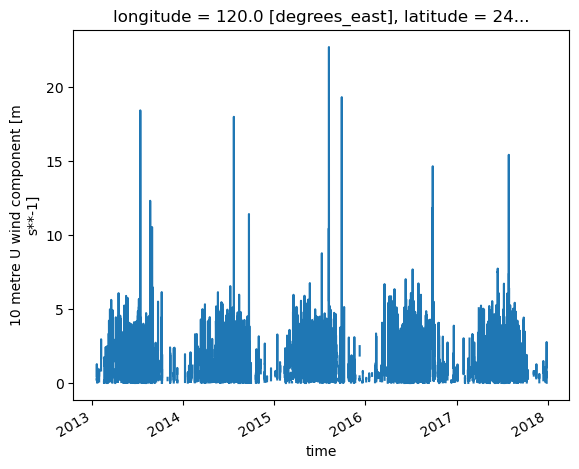

In [10]:
wind.where(wind.u10 > 0).sel(latitude=24, longitude=120).u10.plot()

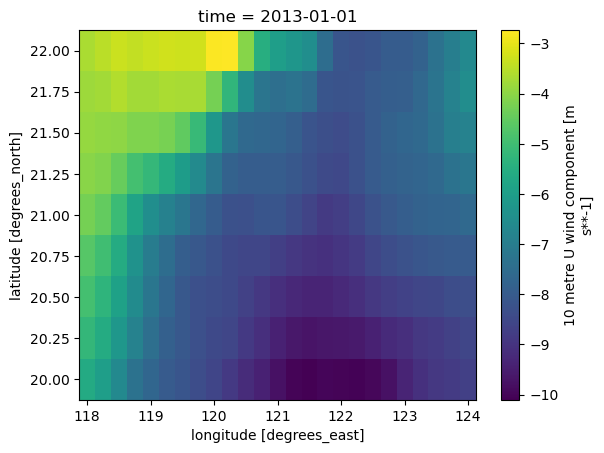

In [20]:
wind.sel(latitude=slice(22, 20)).u10[0, :, :].plot()